In [1]:
%load_ext autoreload

In [10]:
%autoreload 2
from soundcomp import Sound, Signal
import soundcomp as sc
# Louis

In [7]:
%matplotlib inline
import librosa
import librosa.display
from soundfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import signal as sig
from noisereduce import reduce_noise

In [69]:
# Créer des instance de Son à partir des fichiers
file1 = "test_leste/1-1.wav"
file2 = "soundfiles/Carbon_D0_2.wav"
file3 = "soundfiles/Wood_D0_2.wav"

test1 = Sound(file1)
test2 = Sound(file2)
test3 = Sound(file3)

test1.condition()
test2.condition()
test3.condition()

Signal is too short to be trimmed before onset.

Not sufficient noise in the raw signal, unable to filter.



## Test for `double_plot()`

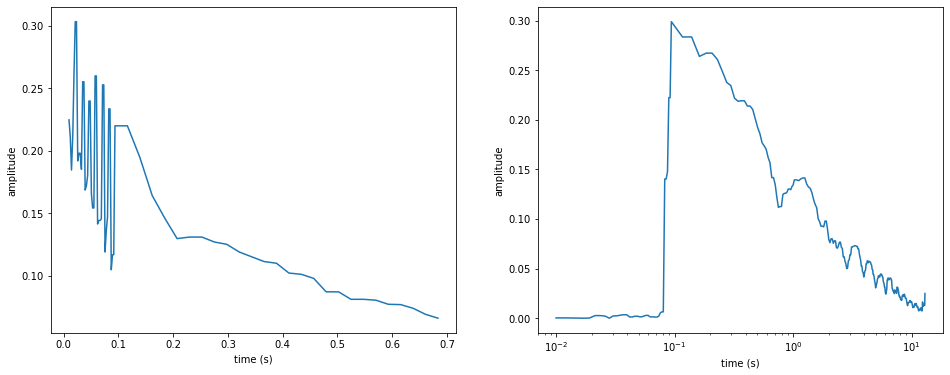

In [72]:
sc.double_plot(test1.signal.plot, test2.signal.plot, kind='log envelop')
plt.xscale('log')

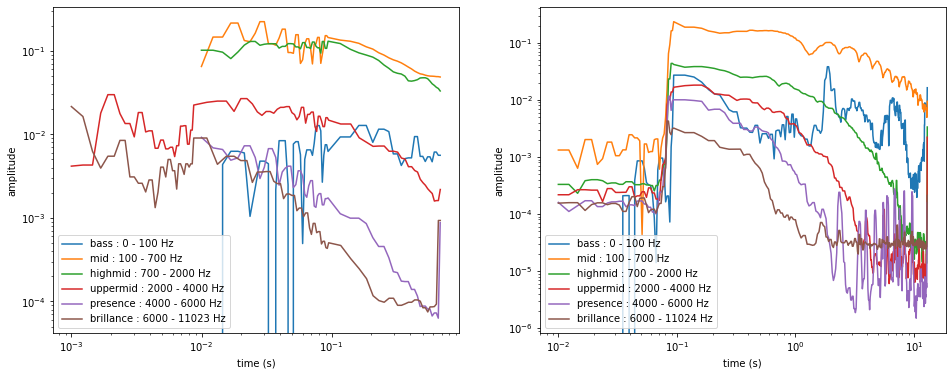

In [73]:
sc.double_plot(test1.plot_freq_bins, test2.plot_freq_bins)

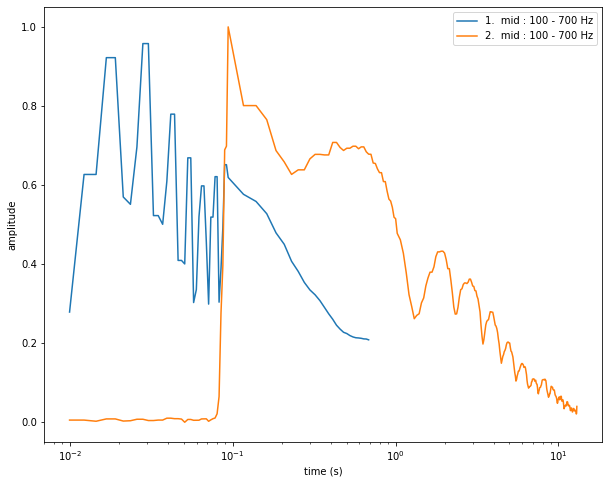

In [77]:
sc.time_compare(test1, test2, fbin='mid')

## Test for `log_envelop`

In [75]:
test1.signal.get_log_envelop()
test2.signal.get_log_envelop()

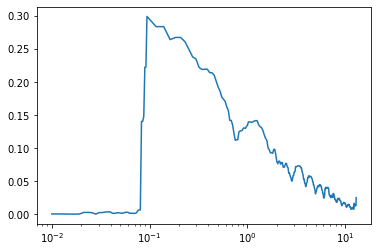

In [76]:
plt.figure()
plt.plot(test2.signal.log_envelop_time, test2.signal.log_envelop)
plt.xscale('log')

## Test for changing global parameters

1. Change the parameter globally then create the sound object :

In [82]:
sc.SP.envelop.frame_size = 20000

file2 = "soundfiles/Carbon_D0_2.wav"
file3 = "soundfiles/Wood_D0_2.wav"

test2 = Sound(file2)
test3 = Sound(file3)

test2.condition()
test3.condition()

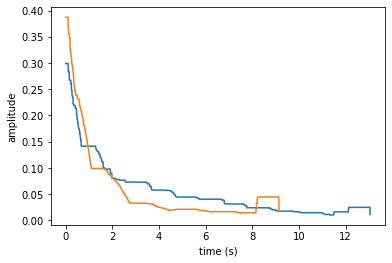

In [87]:
test2.signal.plot(kind='envelop')
test3.signal.plot(kind='envelop')

2. Change the parameters inside of an existing sound class

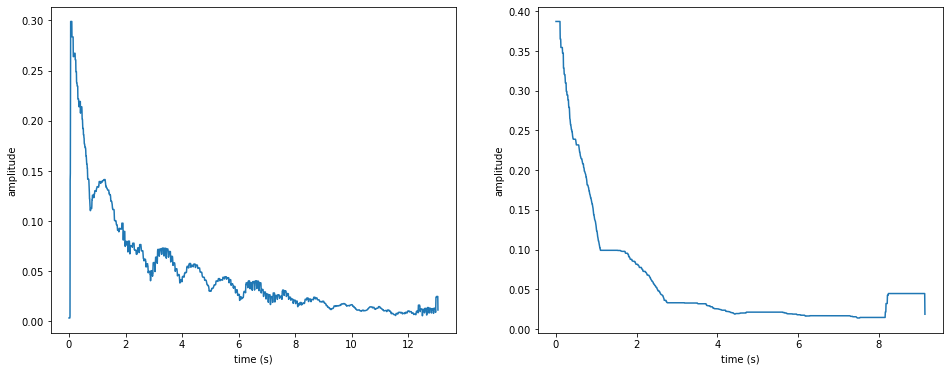

In [88]:
# Create a copy of the global parameters
SP_copy = sc.SP
SP_copy.envelop.frame_size = 1000  # change a parameter value 
test2.change_params(SP_copy)  # use the new parameters in the test2 Sound

# Validate
sc.double_plot(test2.signal.plot, test3.signal.plot, kind='envelop')
# Ajouter des titres

In [54]:
# Remove the base methods and attributes
first_level = dict(filter(lambda elem: not elem[0].startswith('__'), sc.SP.__dict__.items()))

# Remove the functions
first_level

{'env': soundcomp.SP.env,
 'gen': soundcomp.SP.gen,
 'log_e': soundcomp.SP.log_e,
 'fund': soundcomp.SP.fund,
 'general': soundcomp.SP.gen,
 'log_envelop': soundcomp.SP.log_e,
 'envelop': soundcomp.SP.env,
 'bins': {'bass': 100,
  'mid': 700,
  'highmid': 2000,
  'uppermid': 4000,
  'presence': 6000},
 'build_dict': <function soundcomp.SP.build_dict(self)>,
 'print_parameters': <function soundcomp.SP.print_parameters(self)>}